In [97]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import json
import numpy as np
import openpyxl
import matplotlib.pyplot as plt

df_energy = pd.read_csv('../data/energy.csv')


In [98]:
# Het filteren van de dataframe zodat alleen de rijen na het jaar 1972 worden gebruikt voor de kaart.
# Dit wordt gedaan in verband met de schaarse aanweizgheid van waarden in andere kolommen in de jaren daarvoor.
filtered_df = df_energy[df_energy['year'] > 1972]

# Kies relevante kolommen
relevante_columns = ['cumulative_co2', 'iso_code', 'country', 'year', 'population']
filtered_df2 = filtered_df[relevante_columns]


In [99]:
def delete_countries_missing_values(df):
    """
    Een functie die voor zorgt dat de landen, dus rijen met een bepaalde waarden in de kolom 'country', overblijven in dataframe
    die geen missing values hebben in de kolom 'cumulative_co2'
    """

    # Landen met alleen missende waarden in 'cumulative_co2'
    missing_countries = df[df['cumulative_co2'].isna()]['country'].unique()

    # Filteren van de DataFrame om rijen met deze landen met missende waarden in 'cumulative_co2' te verwijderen
    final_df = df[~df['country'].isin(missing_countries)]

    return final_df

df_energy_2 = delete_countries_missing_values(filtered_df2)

# Controleer de DataFrame om te zien of de landen met missende waarden in kolom 'cumulative_co2' succesvol zijn verwijderd
before = len(filtered_df2['country'].unique())
after = len(df_energy_2['country'].unique())

if before > after:
    print('Gelukt!')


Gelukt!


In [100]:
# Filter de DataFrame om alleen de rijen te bevatten waar 'population' missende waarden heeft
missing_population = df_energy_2[df_energy_2['population'].isna()]

# Groepeer de gefilterde DataFrame op 'country' en tel het aantal missende waarden per land
missing_count_per_country = missing_population.groupby('country').size()

# Converteer de Series naar een DataFrame voor betere leesbaarheid en voeg een kolomnaam toe
missing_count_per_country_df = missing_count_per_country.reset_index(name='Missing_population')

# Sorteer het DataFrame op het aantal missende waarden voor een duidelijk overzicht
missing_count_per_country_df = missing_count_per_country_df.sort_values(by='Missing_population', ascending=False)

# Output:
#                         country  Missing_co2_count
# 0  Asia (excl. China and India)                 50
# 1          Europe (excl. EU-27)                 50
# 2          Europe (excl. EU-28)                 50
# 3           European Union (28)                 50
# 4        International aviation                 50
# 5        International shipping                 50
# 6     North America (excl. USA)                 50

# Dit betekent dat bovenstaande waarde voor country geen een rij heb met een waarde voor cumulative_co2.
# Hierdoor kunnen deze rijen met de waarden voor country uit de df worden gehaald.

# Haal de lijst van landen op die moeten worden verwijderd
countries_to_remove = missing_count_per_country_df['country']

# Filter de originele DataFrame om deze landen uit te sluiten
df_energy_3 = df_energy_2[~df_energy_2['country'].isin(countries_to_remove)]

# Controleer het resultaat na het verwijderen
print("Verwijderde landen controle:")
print(df_energy_3[df_energy_3['country'].isin(countries_to_remove)])
# Output:
# Verwijderde landen controle:
# Empty DataFrame
# Columns: [cumulative_co2, iso_code, country, year, population]
# Index: []


Verwijderde landen controle:
Empty DataFrame
Columns: [cumulative_co2, iso_code, country, year, population]
Index: []


In [101]:

# Filter de DataFrame om alleen de rijen te bevatten waar 'population' missende waarden heeft
missing_iso = df_energy_2[df_energy_2['iso_code'].isna()]

# Groepeer de gefilterde DataFrame op 'country' en tel het aantal missende waarden per land
missing_iso_per_country = missing_iso.groupby('country').size()

# Converteer de Series naar een DataFrame voor betere leesbaarheid en voeg een kolomnaam toe
missing_iso_per_country_df = missing_iso_per_country.reset_index(name='Missing_iso')

# Sorteer het DataFrame op het aantal missende waarden voor een duidelijk overzicht
missing_iso_per_country_df = missing_iso_per_country_df.sort_values(by='Missing_iso', ascending=False)

# Output:
#                         country  Missing_iso
# 0  Asia (excl. China and India)           50
# 1          Europe (excl. EU-27)           50
# 2          Europe (excl. EU-28)           50
# 3           European Union (28)           50
# 4        International aviation           50
# 5        International shipping           50
# 6     North America (excl. USA)           50

# Zelfde geval als hierboven, dus weer het verwijderen van rijen waarvan de waarde in de kolom 'country' in de bovenstaande tabel staat.

# Haal de lijst van landen op die moeten worden verwijderd
countries_to_remove_2 = missing_iso_per_country_df['country']

# Filter de originele DataFrame om deze landen uit te sluiten
df_energy_4 = df_energy_3[~df_energy_3['country'].isin(countries_to_remove_2)]

# Controleer het resultaat na het verwijderen
print("Verwijderde landen controle:")
print(df_energy_4[df_energy_4['country'].isin(countries_to_remove_2)])


Verwijderde landen controle:
Empty DataFrame
Columns: [cumulative_co2, iso_code, country, year, population]
Index: []


In [117]:
# Om de verscheidene landen met elkaar te vergelijken, wordt in de wereldkaart gekeken naar de cumulatieve co2 per capita.
# Dat wil zeggen dat de cumulative co2 uitstoot met elkaar wordt vergeleken relatief gezien.
# Dit wordt bereiekt door de cumulative_co2 kolom te delen door de kolom population
df_energy_4['cumulative_co2_per_capita']= df_energy_4['cumulative_co2'] / df_energy_4['population']


(10050, 5)
cumulative_co2    0
iso_code          0
country           0
year              0
population        0
dtype: int64


/tmp/ipykernel_4042/1704651574.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



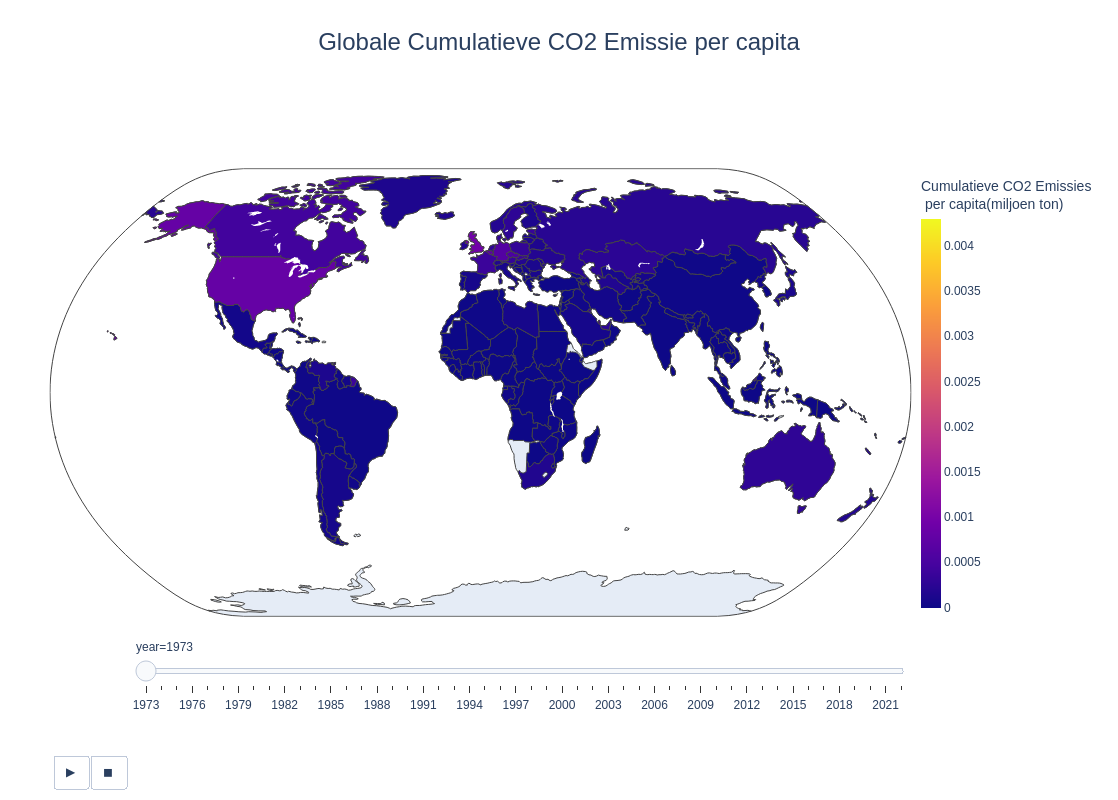

In [122]:
fig = px.choropleth(df_energy_4,
                    locations="iso_code",   # ISO-codes van landen gebruiken voor locatie
                    color="cumulative_co2_per_capita",  # CO2-uitstoot als kleurschaal
                    hover_name="country",    # Toon landnamen bij hover
                    animation_frame="year",  # Animeren over de jaren
                    projection="natural earth",  # Projectiestijl van de kaart
                    title='Globale Cumulatieve CO2 Emissie per capita tussen 1973 en 2022',
                    color_continuous_scale=px.colors.sequential.Plasma)  # Kleurenschema

# De grootte van de kaart aanpassen
fig.update_layout(
    width=1150,   # Breedte van de kaart
    height=800,   # Hoogte van de kaart
    title=dict(text='Globale Cumulatieve CO2 Emissie per capita', x=0.5, font=dict(size=24)),  # Centreren en opmaken van de titel
    coloraxis_colorbar=dict(
        title='Cumulatieve CO2 Emissies <br> per capita(miljoen ton)',  # Aangepaste titel om te passen
        title_font=dict(size=14),  # Aanpassen van de lettergrootte van de titel
        thicknessmode='pixels', thickness=20,
        lenmode='pixels', len=450,
        yanchor='middle', y=0.5,  # Centreren van de colorbar verticaal
        xanchor='left', x=1.0  # Plaatsen van de colorbar aan de rechterkant
    ),
    margin=dict(l=50, r=150, t=100, b=50)  # Aanpassen van marges, vergroot rechter marge
)

# Aanpassen van de animatieslider positie
fig['layout']['sliders'][0]['pad'] = dict(t=-50)  # Negatieve top padding om de slider hoger te positioneren

# Toon de kaart
fig.show()
